In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import requests
import re
from fastai.text import *
import torch

In [82]:
with open("/home/paperspace/WarOfTheRNNs/data/book_raw.txt") as f:
    book = f.read()

In [85]:
! rm /home/paperspace/WarOfTheRNNs/data/book_text.csv

In [116]:
book_clean = book.replace('. ', ' . |').replace('? ', ' ? |').replace('! ', ' ! |').replace('\n', ' ').split("|")
book_clean = [i.strip() for i in book_clean if len(i.strip()) > 1]

In [117]:
with open('/home/paperspace/WarOfTheRNNs/data/book_text.csv', 'a+') as file:
    for sentence in book_clean:
        file.write(sentence + '\n')

In [118]:
with open('/home/paperspace/WarOfTheRNNs/data/book_text.csv') as file:
    lines = file.readlines()[:5]
print(lines[0])
print(lines[1])
print(lines[2])

BOC No one would have believed in the last years of the nineteenth century that this world was being watched keenly and closely by intelligences greater than man’s and yet as mortal as his own; that as men busied themselves about their various concerns they were scrutinised and studied, perhaps almost as narrowly as a man with a microscope might scrutinise the transient creatures that swarm and multiply in a drop of water . 

With infinite complacency men went to and fro over this globe about their little affairs, serene in their assurance of their empire over matter . 

It is possible that the infusoria under the microscope do the same . 



In [119]:
pd.read_csv('/home/paperspace/WarOfTheRNNs/data/book_text.csv', delimiter="|", header=None)

,0
0,BOC No one would have believed in the last yea...
1,With infinite complacency men went to and fro ...
2,It is possible that the infusoria under the mi...
3,No one gave a thought to the older worlds of s...
4,It is curious to recall some of the mental hab...
5,At most terrestrial men fancied there might be...
6,"Yet across the gulf of space, minds that are t..."
7,And early in the twentieth century came the gr...
8,"It must be, if the nebular hypothesis has any ..."
9,The fact that it is scarcely one seventh of th...


In [123]:
data = TextLMDataBunch.from_csv('.', '/home/paperspace/WarOfTheRNNs/data/book_text.csv', text_cols=0, delimiter="|")

In [124]:
data

TextLMDataBunch;

Train: LabelList (5603 items)
x: LMTextList
xxbos i saw people struggling shorewards , and heard their screaming and shouting faintly above the seething and roar of the xxmaj martian ’s collapse . xxmaj for a moment i heeded nothing of the heat , forgot the patent need of self - preservation .,xxbos xxmaj apparently they had learned something of my story from me during the days of my lapse . xxmaj very gently , when my mind was assured again , did they break to me what they had learned of the fate of xxmaj leatherhead .,xxbos xxmaj and it ’s the man that keeps on thinking comes through .,xxbos “ xxmaj death is coming !,xxbos xxmaj probably this is due to the relative strength of the earth ’s gravitational energy . ” xxmaj on that last text their leader - writer expanded very comfortingly . xxmaj of course all the students in the crammer ’s biology class , to which my brother went that day , were intensely interested , but there were no signs of any unusual excitement 

In [125]:
data.train_ds[0]

(Text xxbos i saw people struggling shorewards , and heard their screaming and shouting faintly above the seething and roar of the xxmaj martian ’s collapse . xxmaj for a moment i heeded nothing of the heat , forgot the patent need of self - preservation .,
 EmptyLabel )

In [126]:
data.train_ds[1][0].data

array([   2,    5,  594,   31,   21,  489,  211,   13,   22,  430,   33,   37,  595,    9,  251,   13,   22, 3408,
         11,    5,  111, 1846,   10,  115,   22,  212,   18, 1847,   85,   10,  100,   31, 1240,   16,   37,   83,
         31,   21,  489,   13,    9, 1005,   13,    5,  393,   11])

In [127]:
data.valid_ds[1][0].data

array([   2,    5,   25,   92,  739, 3152,   33,   41,    0,   30,    9,  250,  597,   33,   41, 1377,    0,   16,
        638,   11])

In [128]:
data.one_batch()[0].shape

torch.Size([64, 70])

In [129]:
x, y = data.one_batch()

In [130]:
x.shape, y.shape

(torch.Size([64, 70]), torch.Size([64, 70]))

In [131]:
x[0], y[0]

(tensor([3413,  111, 3414,   11,    5,   13,  596,   48,    9, 2229,   17,    9,
         3415,   47, 3416, 3417,   10,   16,   97,   22,   90,   91,   19,  116,
           10,   29, 1415, 2230,   10,   35,   36,   29,   56, 1536,   13,  141,
         1416,  912,   17,    9,  291,   11,    2,    5,   40,  797,   14,    5,
          108,   21,   59,  133,   26,    5, 3418,   10,   12,   14,  611,   13,
          194, 1848,   77,  353,  354,  122,    9,    5,  368,   12]),
 tensor([ 111, 3414,   11,    5,   13,  596,   48,    9, 2229,   17,    9, 3415,
           47, 3416, 3417,   10,   16,   97,   22,   90,   91,   19,  116,   10,
           29, 1415, 2230,   10,   35,   36,   29,   56, 1536,   13,  141, 1416,
          912,   17,    9,  291,   11,    2,    5,   40,  797,   14,    5,  108,
           21,   59,  133,   26,    5, 3418,   10,   12,   14,  611,   13,  194,
         1848,   77,  353,  354,  122,    9,    5,  368,   12,   96]))

In [132]:
len(data.vocab.itos)

6448

In [133]:
nv = len(data.vocab.itos)

In [134]:
nh = 64

In [135]:
bs = 64

In [136]:
nv, nh, bs

(6448, 64, 64)

In [137]:
learn = language_model_learner(data, AWD_LSTM, metrics=accuracy) # pretrained=True by default

In [138]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


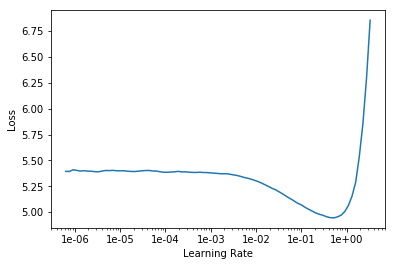

In [139]:
learn.recorder.plot()

In [140]:
lr = 3e-2

In [141]:
learn.fit_one_cycle(5, max_lr=lr)

epoch,train_loss,valid_loss,accuracy,time
0,4.707609,3.718987,0.311871,00:13
1,3.892534,3.058248,0.377131,00:13
2,3.319177,2.714270,0.421733,00:13
3,2.897290,2.516869,0.454464,00:13
4,2.623685,2.481668,0.462135,00:13


In [142]:
learn.save("awd-lstm-1")

In [143]:
learn.load("awd-lstm-1")

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (5603 items)
x: LMTextList
xxbos i saw people struggling shorewards , and heard their screaming and shouting faintly above the seething and roar of the xxmaj martian ’s collapse . xxmaj for a moment i heeded nothing of the heat , forgot the patent need of self - preservation .,xxbos xxmaj apparently they had learned something of my story from me during the days of my lapse . xxmaj very gently , when my mind was assured again , did they break to me what they had learned of the fate of xxmaj leatherhead .,xxbos xxmaj and it ’s the man that keeps on thinking comes through .,xxbos “ xxmaj death is coming !,xxbos xxmaj probably this is due to the relative strength of the earth ’s gravitational energy . ” xxmaj on that last text their leader - writer expanded very comfortingly . xxmaj of course all the students in the crammer ’s biology class , to which my brother went that day , were intensely interested , but there were no signs of an

In [144]:
learn.predict(test_snippet, n_words=30)

'The martian stood in the darkness  , the appearance of the cylinder and the shadow of a violent abbreviated tube . The cylinder was the fourth cylinder seeking its purpose . xxbos I could'

In [145]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


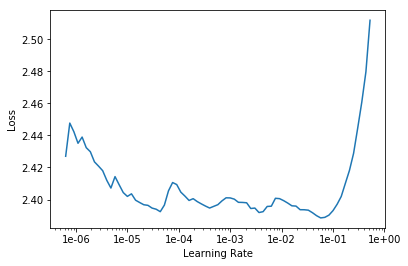

In [146]:
learn.recorder.plot(skip_end=15)

In [147]:
lr = 1e-4

In [148]:
learn.fit_one_cycle(5, max_lr=lr)

epoch,train_loss,valid_loss,accuracy,time
0,2.395281,2.481614,0.461871,00:13
1,2.386383,2.478925,0.462175,00:13
2,2.387385,2.475841,0.463129,00:13
3,2.374497,2.474733,0.462967,00:13
4,2.383349,2.475106,0.462865,00:13


In [149]:
learn.save("awd-lstm-2")

In [150]:
learn.load("awd-lstm-2")

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (5603 items)
x: LMTextList
xxbos i saw people struggling shorewards , and heard their screaming and shouting faintly above the seething and roar of the xxmaj martian ’s collapse . xxmaj for a moment i heeded nothing of the heat , forgot the patent need of self - preservation .,xxbos xxmaj apparently they had learned something of my story from me during the days of my lapse . xxmaj very gently , when my mind was assured again , did they break to me what they had learned of the fate of xxmaj leatherhead .,xxbos xxmaj and it ’s the man that keeps on thinking comes through .,xxbos “ xxmaj death is coming !,xxbos xxmaj probably this is due to the relative strength of the earth ’s gravitational energy . ” xxmaj on that last text their leader - writer expanded very comfortingly . xxmaj of course all the students in the crammer ’s biology class , to which my brother went that day , were intensely interested , but there were no signs of an

In [153]:
learn.predict("The martian stood in the darkness ", n_words=100)

'The martian stood in the darkness  , and the Martian sprang slowly out of it at once . xxbos i forced a grotesque , well methodical , and foolish idea of a civilised dinner digging to repent — repent ! xxbos The scum was absolutely insoluble and was absolutely insoluble , seeing the instant effect of the scum and the mound of bluish dust . xxbos After me , we ’d not be 10,000,000 miles away , and can no doubt how it is impossible . xxbos Petroleum afterwards found the house in our garden open and a few score of yards'

In [151]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


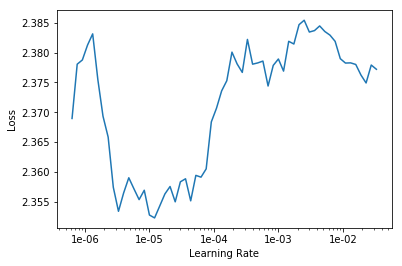

In [155]:
learn.recorder.plot(skip_end=30)

In [156]:
learn.fit_one_cycle(5, max_lr=4e-6)

epoch,train_loss,valid_loss,accuracy,time
0,2.398948,2.474165,0.463170,00:13
1,2.381445,2.474466,0.462764,00:13
2,2.391721,2.473983,0.463393,00:13
3,2.391970,2.475871,0.463028,00:13
4,2.393487,2.473896,0.462561,00:13


In [157]:
learn.save("awd-lstm-3")

In [158]:
learn.load("awd-lstm-2")

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (5603 items)
x: LMTextList
xxbos i saw people struggling shorewards , and heard their screaming and shouting faintly above the seething and roar of the xxmaj martian ’s collapse . xxmaj for a moment i heeded nothing of the heat , forgot the patent need of self - preservation .,xxbos xxmaj apparently they had learned something of my story from me during the days of my lapse . xxmaj very gently , when my mind was assured again , did they break to me what they had learned of the fate of xxmaj leatherhead .,xxbos xxmaj and it ’s the man that keeps on thinking comes through .,xxbos “ xxmaj death is coming !,xxbos xxmaj probably this is due to the relative strength of the earth ’s gravitational energy . ” xxmaj on that last text their leader - writer expanded very comfortingly . xxmaj of course all the students in the crammer ’s biology class , to which my brother went that day , were intensely interested , but there were no signs of an

In [77]:
learn.fit_one_cycle(3, 3e-4)

epoch,train_loss,valid_loss,accuracy,time
0,3.391436,3.944928,0.261049,00:03
1,3.392781,3.943104,0.260658,00:03
2,3.393323,3.943165,0.261384,00:03


In [159]:
learn.unfreeze()

In [160]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


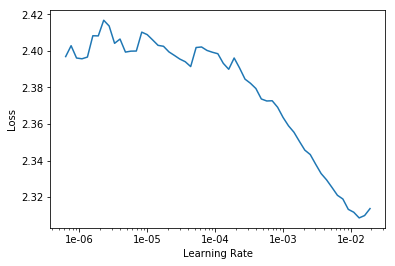

In [164]:
learn.recorder.plot(skip_end=30)

In [165]:
learn.fit_one_cycle(5, max_lr=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.257787,2.238874,0.504221,00:17
1,2.040305,1.844380,0.583888,00:17
2,1.703753,1.461849,0.673498,00:17
3,1.403476,1.255484,0.723701,00:17
4,1.182582,1.217576,0.732630,00:17


In [166]:
learn.predict(test_snippet, n_words=100)

'The martian stood in the darkness  regarding me . The hood burst like a gigantic gas , and he stood painfully out under the mound . xxbos It seemed to me him that all this he had made , no relation between the Martians and the Martians . i should have stayed by him but for the brutal expression of his face . xxbos And in the back of this head , face ! xxbos And all this time i felt a vague , a growing craving to look once more on whatever remained of the little life that seemed'

In [167]:
learn.save("awd-lstm-4")

In [168]:
learn.load("awd-lstm-4")

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (5603 items)
x: LMTextList
xxbos i saw people struggling shorewards , and heard their screaming and shouting faintly above the seething and roar of the xxmaj martian ’s collapse . xxmaj for a moment i heeded nothing of the heat , forgot the patent need of self - preservation .,xxbos xxmaj apparently they had learned something of my story from me during the days of my lapse . xxmaj very gently , when my mind was assured again , did they break to me what they had learned of the fate of xxmaj leatherhead .,xxbos xxmaj and it ’s the man that keeps on thinking comes through .,xxbos “ xxmaj death is coming !,xxbos xxmaj probably this is due to the relative strength of the earth ’s gravitational energy . ” xxmaj on that last text their leader - writer expanded very comfortingly . xxmaj of course all the students in the crammer ’s biology class , to which my brother went that day , were intensely interested , but there were no signs of an

In [169]:
learn.fit_one_cycle(10, max_lr=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.968449,1.144415,0.751502,00:17
1,0.943561,1.014594,0.783563,00:17
2,0.919239,0.898820,0.811607,00:17
3,0.875352,0.792193,0.838413,00:17
4,0.779508,0.693480,0.861425,00:17
5,0.684313,0.639296,0.876745,00:17
6,0.603677,0.594924,0.886201,00:17
7,0.546042,0.578345,0.890097,00:17
8,0.503430,0.564848,0.891985,00:17
9,0.484314,0.566929,0.891802,00:17


In [170]:
learn.predict(test_snippet, n_words=100)

'The martian stood in the darkness  staring at the strange , complex apparatus of digestion , which had taken a lump of coal to examine . i seized the opportunity of slightly shifting my position , which had become cramped , and then listened . xxbos i go ! xxbos From there we could see the searchlights on Kingston Hill and Kingston Hill going to and fro , and about eleven the windows rattled , and we heard the sound of the huge siege guns that had been put in position there . xxbos It may be that across the'

In [174]:
learn.fit_one_cycle(10, max_lr=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.984163,1.150082,0.749574,00:17
1,0.970286,1.052697,0.773214,00:17
2,0.947784,0.921846,0.807995,00:17
3,0.869171,0.791080,0.839387,00:17
4,0.788402,0.706615,0.860085,00:17
5,0.701246,0.641725,0.875284,00:17
6,0.616977,0.598144,0.884314,00:17
7,0.555647,0.577747,0.889286,00:17
8,0.508160,0.569720,0.891335,00:17
9,0.486440,0.564845,0.891842,00:17


In [175]:
learn.save("awd-lstm-5")

In [176]:
learn.load("awd-lstm-5")

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (5603 items)
x: LMTextList
xxbos i saw people struggling shorewards , and heard their screaming and shouting faintly above the seething and roar of the xxmaj martian ’s collapse . xxmaj for a moment i heeded nothing of the heat , forgot the patent need of self - preservation .,xxbos xxmaj apparently they had learned something of my story from me during the days of my lapse . xxmaj very gently , when my mind was assured again , did they break to me what they had learned of the fate of xxmaj leatherhead .,xxbos xxmaj and it ’s the man that keeps on thinking comes through .,xxbos “ xxmaj death is coming !,xxbos xxmaj probably this is due to the relative strength of the earth ’s gravitational energy . ” xxmaj on that last text their leader - writer expanded very comfortingly . xxmaj of course all the students in the crammer ’s biology class , to which my brother went that day , were intensely interested , but there were no signs of an

In [177]:
learn.fit_one_cycle(10, max_lr=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.464480,0.560063,0.892675,00:17
1,0.489028,0.562955,0.894460,00:17
2,0.511862,0.572919,0.892837,00:17
3,0.519749,0.558645,0.895069,00:17
4,0.512629,0.549342,0.895840,00:17
5,0.488836,0.533895,0.897930,00:17
6,0.457347,0.526002,0.898965,00:17
7,0.431832,0.522975,0.898580,00:17
8,0.406672,0.518595,0.899188,00:17
9,0.393734,0.518315,0.898904,00:17


In [178]:
learn.predict(test_snippet, n_words=100)

'The martian stood in the darkness  staring at the faintly lit doorway into the kitchen , and listening . xxbos They wanted a light railing put up , and help to keep the people back . xxbos i came into the road between the crossroads and Horsell , and ran along this to the crossroads . At last i could go no further ; i was exhausted with the violence of my emotion and of my flight , and i staggered and fell by the wayside . xxbos At most terrestrial men fancied there might be other men upon Mars ,'

In [179]:
learn.save("awd-lstm-6")

In [180]:
learn.load("awd-lstm-6")

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (5603 items)
x: LMTextList
xxbos i saw people struggling shorewards , and heard their screaming and shouting faintly above the seething and roar of the xxmaj martian ’s collapse . xxmaj for a moment i heeded nothing of the heat , forgot the patent need of self - preservation .,xxbos xxmaj apparently they had learned something of my story from me during the days of my lapse . xxmaj very gently , when my mind was assured again , did they break to me what they had learned of the fate of xxmaj leatherhead .,xxbos xxmaj and it ’s the man that keeps on thinking comes through .,xxbos “ xxmaj death is coming !,xxbos xxmaj probably this is due to the relative strength of the earth ’s gravitational energy . ” xxmaj on that last text their leader - writer expanded very comfortingly . xxmaj of course all the students in the crammer ’s biology class , to which my brother went that day , were intensely interested , but there were no signs of an

In [181]:
learn.fit_one_cycle(10, max_lr=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.381596,0.517110,0.899229,00:17
1,0.399819,0.525532,0.899797,00:17
2,0.419243,0.539217,0.898945,00:17
3,0.434489,0.539760,0.898153,00:17
4,0.428152,0.532781,0.899107,00:17
5,0.415881,0.523976,0.898884,00:17
6,0.398401,0.519365,0.899209,00:17
7,0.379563,0.514068,0.899777,00:17
8,0.363009,0.508867,0.900122,00:17
9,0.356438,0.509238,0.899980,00:17


In [182]:
learn.save("awd-lstm-7")

In [183]:
learn.load("awd-lstm-7")

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (5603 items)
x: LMTextList
xxbos i saw people struggling shorewards , and heard their screaming and shouting faintly above the seething and roar of the xxmaj martian ’s collapse . xxmaj for a moment i heeded nothing of the heat , forgot the patent need of self - preservation .,xxbos xxmaj apparently they had learned something of my story from me during the days of my lapse . xxmaj very gently , when my mind was assured again , did they break to me what they had learned of the fate of xxmaj leatherhead .,xxbos xxmaj and it ’s the man that keeps on thinking comes through .,xxbos “ xxmaj death is coming !,xxbos xxmaj probably this is due to the relative strength of the earth ’s gravitational energy . ” xxmaj on that last text their leader - writer expanded very comfortingly . xxmaj of course all the students in the crammer ’s biology class , to which my brother went that day , were intensely interested , but there were no signs of an

In [184]:
learn.predict(test_snippet, n_words=100)

'The martian stood in the darkness  staring at the faint flickering that danced over the top of the window , and saw to the right a few red lantern throwing a feeble sum upon the mound of rubble . xxbos Elphinstone . xxbos Aloo!”—and in another minute they were with its companion , half a mile away , stooping over something in the field . xxbos “ Thenks ” ; and all three of them laughed . i felt foolish and angry . xxbos With that realisation my dormant sense of wonder , my sense of the proportion of things , awoke'

In [185]:
learn.fit_one_cycle(10, max_lr=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.349048,0.509179,0.899797,00:17
1,0.351755,0.518945,0.899330,00:17
2,0.366603,0.532414,0.898113,00:17
3,0.391929,0.535002,0.899980,00:17
4,0.392954,0.529511,0.899209,00:17
5,0.389355,0.523144,0.899452,00:17
6,0.380804,0.519512,0.899635,00:17
7,0.357244,0.512779,0.899939,00:17
8,0.344373,0.512757,0.900101,00:17
9,0.338862,0.512483,0.899736,00:17


In [191]:
learn.predict(test_snippet, n_words=100)

'The martian stood in the darkness  staring at the sunlit devastation that flowed past the windows . xxbos i found myself alone , and saw the people on the other side of the pit running off , Stent among them . xxbos They ’ve walked over us . xxbos There in the darkness a man blundered into me and sent me reeling back . He gave a cry of terror , sprang sideways , and rushed on before i could gather my wits sufficiently to speak to him . xxbos They have told me since that i was singing some insane'

In [189]:
learn.save("awd-lstm-8")

In [192]:
learn.load("awd-lstm-7")

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (5603 items)
x: LMTextList
xxbos i saw people struggling shorewards , and heard their screaming and shouting faintly above the seething and roar of the xxmaj martian ’s collapse . xxmaj for a moment i heeded nothing of the heat , forgot the patent need of self - preservation .,xxbos xxmaj apparently they had learned something of my story from me during the days of my lapse . xxmaj very gently , when my mind was assured again , did they break to me what they had learned of the fate of xxmaj leatherhead .,xxbos xxmaj and it ’s the man that keeps on thinking comes through .,xxbos “ xxmaj death is coming !,xxbos xxmaj probably this is due to the relative strength of the earth ’s gravitational energy . ” xxmaj on that last text their leader - writer expanded very comfortingly . xxmaj of course all the students in the crammer ’s biology class , to which my brother went that day , were intensely interested , but there were no signs of an

In [193]:
learn.predict(test_snippet, n_words=1000)

'The martian stood in the darkness  curiosity , strangely enough . xxbos The bottle struck the floor and broke , and i desisted and rose . xxbos But the poison was scarcely working yet . xxbos With that realisation my interest shifted to those other creatures , the real Martians . xxbos The lightning flashed for a third time , and his face leaped upon me . xxbos The soldiers i addressed did n’t know anything ; they were mysterious as well as busy . xxbos At the place mound an swayed and struck sent the scattered group of people to the gate . xxbos unmistakably that they did not bury any of their dead , and the reckless slaughter they perpetrated , point also to an entire ignorance of the putrefactive process . xxbos Before i went to bed i had an interval of restlessness , and prowled from window to window , peering out for some sign of these monsters . xxbos At first i scarcely noticed the pit and the cylinder , although it has been convenient to describe them first , on account of the